# Cold k-means

In this element, I am diving into unsupervised learning, where the algorithm learns patterns with unlabeled data. K-means is my favourite unsupervised algorithm, and I will be applying it to a dataset that contains data about various countries. The goal is to group these countries using exports, income, and GDP per capita. 

I begin doing this by importing all the necessary packages. 
- pandas helps with data wrangling 
- numpy helps with data wrangling, as well as providing some convenient array functions
- coldKmeans contains my cold implementation of K-means, as well as an algorithm that helps with elbowology
- matplotlib.pyplot is for visualizing the data for better comprehension 
- mplot 3d from mpl_toolkits is for creating 3d visualizations of data
- sklearn is for the sklearn implementation of K-means
- timeit is for timing my implementation

In [1]:
#importing packages
import pandas as pd
import numpy as np

import coldKmeans as cKm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 

from sklearn.cluster import KMeans 
import timeit

Next, I am importing the data I will be working with using pandas and converting it to a numpy array. Below are the first 5 rows of the dataset.

In [2]:
#importing data
data = pd.read_csv("country_data.csv", sep= ",")
data_NP = data.to_numpy()

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


This is a great dataset with lots of cool variables! However, for this analysis, I will stick to using the exports, income, and GDP per capita for each country. To make things easier, I create a subset containing just these variables.

In [3]:
#creating the subset of variables I will use
data_subset = data[['exports','income','gdpp']]

#dropping rows with NaN values
data_subset = data_subset.dropna()
data_subset.head()


,exports,income,gdpp
0,10.0,1610,553
1,28.0,9930,4090
2,38.4,12900,4460
3,62.3,5900,3530
4,45.5,19100,12200


In [4]:
#turning subset into numpy array
data_subset_NP = data_subset.to_numpy()

Now that I have the subset that contains the variables I would like to use for my clustering, I need to normalize the values. Normalizing variables places all of them between 0 and 1, whhich equalizes variance between different variables. This is important for algorithms like K-means that compute groups based on distances between each one and the cluster centerpoint. With these normalized versions, I create different arrays to represent the different relationships I want to explore, which are exports vs. income vs. GDP per capita, exports vs. GDP per capita, and income vs. GDP per capita.

In [5]:
#normalizing variables in data_subset_NP and creating subsets

exports = data_subset_NP[:,0]
mx = np.max(exports)
mn = np.min(exports)

exports_norm = (exports - mn)/(mx - mn)
exports_norm = np.around(exports_norm, decimals = 2) 

income = data_subset_NP[:,1]
mx = np.max(income)
mn = np.min(income)

income_norm = (income - mn)/(mx - mn)
income_norm = np.around(income_norm, decimals = 2) 

gdpp = data_subset_NP[:,2]
mx = np.max(gdpp)
mn = np.min(gdpp)

gdpp_norm = (gdpp - mn)/(mx - mn)
gdpp_norm = np.around(gdpp_norm, decimals = 2) 

# these are all variables against each other
exports_vs_income_vs_gdpp = np.stack((exports_norm, income_norm,gdpp_norm),axis=-1)

# just exports and GDP per capita
exports_vs_gdpp = np.stack((exports_norm, gdpp_norm),axis=-1)

# just income and GDP per capita
income_vs_gdpp = np.stack((income_norm, gdpp_norm),axis=-1)


# Applying the algorithm

To begin exploring my first relationship, I plot income vs. GDP per capita. 

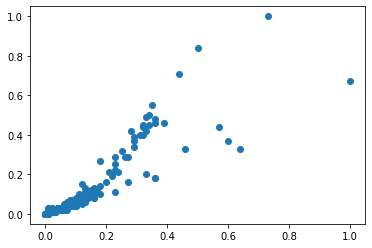

In [6]:
# A visualization of income vs GDP per capita
plt.scatter(x=income_vs_gdpp[:,0],y=income_vs_gdpp[:,1])

It appears the datapoints appear in a fairly linear fashion, however there does appear to be a close cluster of points towards the bottom left.

Now, to determine the ideal number of clusters, I use my looping_kmeans function, which is found in the coldKmeans python file in this directory. The looping_kmeans function computes the cluster's within sum of squares for multiple different clusters and returns a list, with each value corresponding to a number of clusters. To visualize this, I plot the cluster's within sum of squares for each number of clusters.

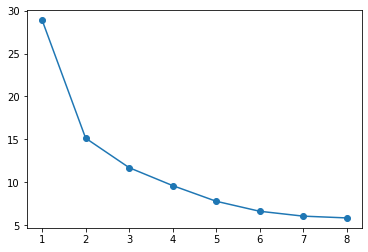

In [7]:
# Determining ideal number of clusters for income vs GDP per capita 

income_vs_gdpp_cluster_number = cKm.looping_kmeans(income_vs_gdpp,[1,2,3,4,5,6,7,8])

plt.plot(range(1,9),income_vs_gdpp_cluster_number,marker='o')
plt.show()

Now, with this plot, I must decide the appropriate number of clusters using the elbow method. The goal is to find an "elbow" in the graph where the within sum of squares change suddenly drops with each additional cluster. This graph doesn't appear to have a clear elbow, but I think the ideal number of clusters is 3. With this, I run my K-means implementation with the number of clusters being 3 and plot eh points with different colours corresponding to their relative groups. 

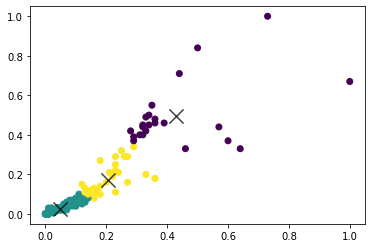

In [8]:
# To show the centers, I run my kmeans and plot the centers

income_vs_gdpp_output = cKm.cold_kmeans(income_vs_gdpp, 3, 1)
plt.scatter(x=income_vs_gdpp[:,0],y=income_vs_gdpp[:,1],c=income_vs_gdpp_output[1])
plt.scatter(income_vs_gdpp_output[0][:, 0], income_vs_gdpp_output[0][:, 1], c='black', marker="x", s=200, alpha=0.75)

Now that the clusters are visualized, I can also view what countries are in each list.

In [9]:
# A list of all the countries in each group

print("The first group of countries is:")
for i in data_NP[np.where(income_vs_gdpp_output[1] == 0),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The second group of countries is:")
for i in data_NP[np.where(income_vs_gdpp_output[1] == 1),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The third group of countries is:")
for i in data_NP[np.where(income_vs_gdpp_output[1] == 2),0]:
    for x in i:
        print(x,end=", ")
print("\n")



The first group of countries is:
Australia, Austria, Belgium, Brunei, Canada, Denmark, Finland, France, Germany, Iceland, Ireland, Japan, Kuwait, Luxembourg, Netherlands, Norway, Qatar, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, 

The second group of countries is:
Afghanistan, Albania, Algeria, Angola, Armenia, Azerbaijan, Bangladesh, Belarus, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, Central African Republic, Chad, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Costa Rica, Cote d'Ivoire, Dominican Republic, Ecuador, Egypt, El Salvador, Eritrea, Fiji, Gabon, Gambia, Georgia, Ghana, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lebanon, Lesotho, Liberia, Macedonia, FYR, Madagascar, Malawi, Maldives, Mali, Mauritania, Mauritius, Micronesia, Fed.

Viewing the results, I think it makes sense for all the more economically developed countries such as the United States and Switzerland to be grouped together in one group, followed by a group containing slightly less economically developed countries, like Greece and Russia, finally followed by the remainder of countries. 

Now, I repeat the above steps for exports vs. GDP per capita and exports vs. income vs. GDP per capita. 

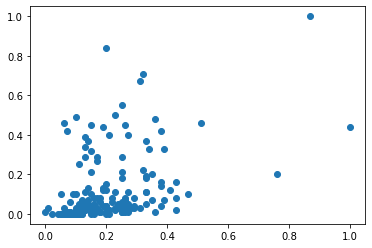

In [10]:
# A visualization of exports vs GDP per capita
plt.scatter(x=exports_vs_gdpp[:,0],y=exports_vs_gdpp[:,1])

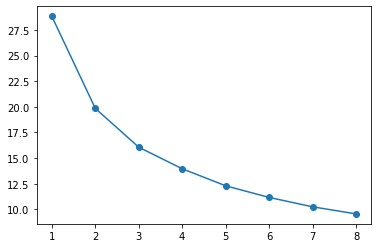

In [11]:
# Determining ideal number of clusters for exports vs GDP per capita

exports_vs_gdpp_cluster_number = cKm.looping_kmeans(exports_vs_gdpp,[1,2,3,4,5,6,7,8])

plt.plot(range(1,9),exports_vs_gdpp_cluster_number,marker='o')
plt.show()

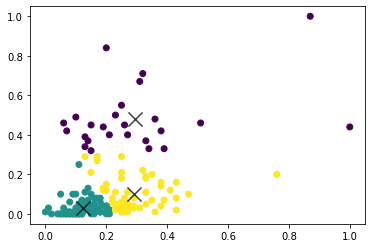

In [12]:
# There is another unclear elbow, but visually I think the idea number of clusters is 3
# To show the centers, I run my kmeans and plot the centers

exports_vs_gdpp_output = cKm.cold_kmeans(exports_vs_gdpp, 3, 1)
plt.scatter(x=exports_vs_gdpp[:,0],y=exports_vs_gdpp[:,1],c=exports_vs_gdpp_output[1])
plt.scatter(exports_vs_gdpp_output[0][:, 0], exports_vs_gdpp_output[0][:, 1], c='black', marker="x", s=200, alpha=0.75)

In [13]:
# A list of all the countries in each group

print("The first group of countries is:")
for i in data_NP[np.where(exports_vs_gdpp_output[1] == 0),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The second group of countries is:")
for i in data_NP[np.where(exports_vs_gdpp_output[1] == 1),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The third group of countries is:")
for i in data_NP[np.where(exports_vs_gdpp_output[1] == 2),0]:
    for x in i:
        print(x,end=", ")
print("\n")

The first group of countries is:
Australia, Austria, Belgium, Brunei, Canada, Denmark, Finland, France, Germany, Iceland, Ireland, Italy, Japan, Kuwait, Luxembourg, Netherlands, New Zealand, Norway, Qatar, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, 

The second group of countries is:
Afghanistan, Albania, Algeria, Argentina, Armenia, Bangladesh, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Burkina Faso, Burundi, Cameroon, Cape Verde, Central African Republic, Chad, China, Colombia, Comoros, Congo, Dem. Rep., Costa Rica, Dominican Republic, Ecuador, Egypt, El Salvador, Eritrea, Gambia, Georgia, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Haiti, India, Indonesia, Iran, Iraq, Jamaica, Kenya, Kiribati, Lao, Lebanon, Lesotho, Liberia, Macedonia, FYR, Madagascar, Malawi, Mali, Micronesia, Fed. Sts., Moldova, Montenegro, Morocco, Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Peru, Philippines, Romania, Russia, Rwanda, 

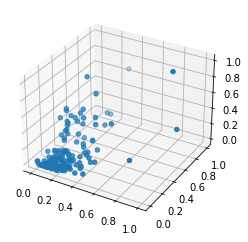

In [14]:
# Include the 3 dimensional visualization
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(exports_vs_income_vs_gdpp[:,0], exports_vs_income_vs_gdpp[:,1], exports_vs_income_vs_gdpp[:,2]);

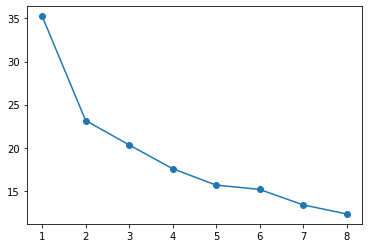

In [15]:
# Determining ideal number of clusters for all variables

exports_vs_income_vs_gdpp_cluster_number = cKm.looping_kmeans(exports_vs_income_vs_gdpp,[1,2,3,4,5,6,7,8])

plt.plot(range(1,9),exports_vs_income_vs_gdpp_cluster_number,marker='o')
plt.show()

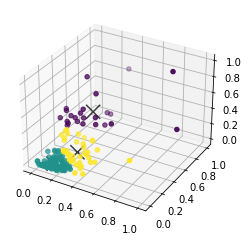

In [16]:
# There is another unclear elbow, but visually I think the idea number of clusters is 3



all_variables_output = cKm.cold_kmeans( exports_vs_income_vs_gdpp, 3, 1)

# Include the 3 dimensional visualization
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(exports_vs_income_vs_gdpp[:,0], exports_vs_income_vs_gdpp[:,1], exports_vs_income_vs_gdpp[:,2],c = all_variables_output[1]);

ax.scatter(all_variables_output[0][:, 0], all_variables_output[0][:, 1], all_variables_output[0][:, 2], c='black', marker="x", s=200, alpha=0.75)


In [17]:
# A list of all the countries in each group

print("The first group of countries is:")
for i in data_NP[np.where(all_variables_output[1] == 0),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The second group of countries is:")
for i in data_NP[np.where(all_variables_output[1] == 1),0]:
    for x in i:
        print(x,end=", ")
print("\n")

print("The third group of countries is:")
for i in data_NP[np.where(all_variables_output[1] == 2),0]:
    for x in i:
        print(x,end=", ")
print("\n")




The first group of countries is:
Australia, Austria, Belgium, Brunei, Canada, Denmark, Finland, France, Germany, Iceland, Ireland, Italy, Japan, Kuwait, Luxembourg, Netherlands, Norway, Qatar, Singapore, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, 

The second group of countries is:
Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Bangladesh, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, Central African Republic, Chad, China, Colombia, Comoros, Congo, Dem. Rep., Costa Rica, Cote d'Ivoire, Dominican Republic, Ecuador, Egypt, El Salvador, Eritrea, Fiji, Gambia, Georgia, Ghana, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lebanon, Lesotho, Liberia, Macedonia, FYR, Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Mozambi

All of my K-means produced 3 groups with similar countries in each list, especially the first group with more economically developed countries. However, the countries in the last two lists seemed to always vary. 

## Comparing cold K-means to sklearn K-means

My cold K-means implementation and that of [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) vary a lot. For starters, the only inputs my implementation takes in is the dataset, the number of clusters, and the random state. The sklearn implementation, on the other hand, takes in a wider array of inputs to accomodate to different users' preferences. Since my kmeans is created to show my understanding of the general logic of the algorithm, I did not include any other inputs. It would also take me much more longer to develop an implementation as intricate as that of sklearn. 

The outputs of the two functions, however, are mostly the same. My implementation only outputs the cluster assignments and the centers, whereas sklearn also outputs the inertia float, corresponding to the sum of squared distances of samples to their closest cluster center, as well as the number of iterations run. I did not implement something like this because I calculate the distances in a separate function. 

I think both implementations are accomplishing their respective tasks well. My implementation demonstrates my understanding of the overall algorithm of K-means, whereas the sklearn implementation is a well thought out algorithm to be used by coders all around the world.

To further explore the differences between these two algorithms, I want to explore the time differences between the two.

In [18]:
%%timeit
# running my cold K-means 

my_Kmeans_implementation_output = cKm.cold_kmeans( exports_vs_income_vs_gdpp, 3, 1)

14.5 ms ± 853 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
# running sklearn K-means
km_alg = KMeans(n_clusters=3, init="random",random_state = 1, max_iter = 300)
fit1 = km_alg.fit(exports_vs_income_vs_gdpp)

16.6 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Although the sklearn implementation took slightly longer, this makes sense because of the customizability of the algorithm. It's also interesting that the standard deviation of my implementation is much smaller than the standard variability of the sklearn implementation. 

One more difference between using the two algorithms is the fact that my cold implementation simply takes a dataset and finds the clusters, whereas the sklearn implementation can be fitted to a dataset, then the clusters of more points can be predicted with the existing fitted algorithm.

# Limitations of K-means

Although K-means is an awesome algorithm that can be used to quickly determine clusters, it does have some limitations, particularly with which data types can be used for it. Here are the different types of variables and how K-means would apply to them:

- Numerical varibles: K-means does a good job of finding clusters with numerical variables. Since K-means works by computing the center and distances from the center, it is easy to do that with numerical values. 
- Categorical variables: Since there is no way to compute the center of clusters with categorical data, K-means doesn't work. An example would be trying to assign a person that likes mint ice cream to two centers, vanilla and chocolate. There is no way to calculate distance from each center and therefore K-means doesn't work.
- Ordinal variables: I think K-means could work on ordinal variables if they are assigned a numerical value. For example, how are you feeling today could be converted to a scale of 1 to 10, and that could be used to assign the feeling of 7 to clusters with centers at 4 and 9. 
